## Using Simulated Annealing to Solve Logic Puzzles

http://blog.pluszero.ca/blog/2016/07/17/using-simulated-annealing-to-solve-logic-puzzles/

We have the following information:

1. Each house’s owner is of a different nationality, either Dane, Brit, Swede, Norwegian, or German.
2. The interior walls of each house are coloured differently, either yellow, red, white, green, or blue.
3. Each house contains a different animal, either horse, cat, bird, fish, or dog.
4. The owner of each house drinks a different beverage, either water, tea, milk, coffee, or root beer.
5. The owner of each house smokes a different kind of cigar, either Pall Mall, Prince, Blue Master, Dunhill, or Blends.

Furthermore, we have the following 15 clues:

1. The Brit lives in the house with red walls.
2. The Swede has a dog.
3. The Dane drinks tea.
4. The house with green walls is directly to the left of the house with white walls.
5. The owner of the house with green walls drinks coffee.
5. The person who smokes Pall Mall cigars owns a bird.
6. The owner of the house with yellow walls smokes Dunhill.
7. The man living in the center house drinks milk.
8. The Norwegian lives in the first house.
9. The man who smokes blends lives next to the cat owner.
10. The horse’s owner lives next to the man who smokes Dunhill.
11. The man who smokes Blue Master drinks root beer.
12. The German smokes Prince.
13. The Norwegian lives next to the house with blue walls.
14. The man who smokes Blends lives next to the man who drinks water.
15. Using nothing but this information, it is possible to figure out who has the fish.

Don’t read ahead yet if you want to figure this out on your own first.

In [4]:
nationalities = [ 'dane',      'brit',   'swede',       'norwegian', 'german'    ]
colours       = [ 'yellow',    'red',    'white',       'green',     'blue'      ]
animals       = [ 'horse',     'cat',    'bird',        'fish',      'dog'       ]
beverages     = [ 'water',     'tea',    'milk',        'coffee',    'root beer' ]
cigars        = [ 'pall mall', 'prince', 'blue master', 'dunhill',   'blends'    ]

attributes = [nationalities, colours, animals, beverages, cigars]

NUM_HOUSES = 5
initial = []

for i in xrange(NUM_HOUSES):
    initial.append([attr[i] for attr in attributes])
    
initial

[['dane', 'yellow', 'horse', 'water', 'pall mall'],
 ['brit', 'red', 'cat', 'tea', 'prince'],
 ['swede', 'white', 'bird', 'milk', 'blue master'],
 ['norwegian', 'green', 'fish', 'coffee', 'dunhill'],
 ['german', 'blue', 'dog', 'root beer', 'blends']]

In [5]:
NAT = 0 # Nationality index
COL = 1 # Colour index
ANI = 2 # Animal index
BEV = 3 # Beverage index
CIG = 4 # Cigar index

In [6]:
def cost_of_state(state):
    cost = 15
    for i, h in enumerate(state):
        cost -= sum([
            h[NAT] == 'brit' and h[COL] == 'red',
            h[NAT] == 'swede' and h[ANI] == 'dog',
            h[NAT] == 'dane' and h[BEV] == 'tea',
            i < 4 and h[COL] == 'green' and state[i+1][COL] == 'white',
            h[COL] == 'green' and h[BEV] == 'coffee',
            h[CIG] == 'pall mall' and h[ANI] == 'bird',
            h[COL] == 'yellow' and h[CIG] == 'dunhill',
            i == 2 and h[BEV] == 'milk',
            i == 0 and h[NAT] == 'norwegian',
            h[CIG] == 'blends' and ((i > 0 and state[i-1][ANI] == 'cat')
                                 or (i < 4 and state[i+1][ANI] == 'cat')),
            h[ANI] == 'horse' and ((i > 0 and state[i-1][CIG] == 'dunhill')
                                 or (i < 4 and state[i+1][CIG] == 'dunhill')),
            h[CIG] == 'blue master' and h[BEV] == 'root beer',
            h[NAT] == 'german' and h[CIG] == 'prince',
            h[NAT] == 'norwegian' and ((i > 0 and state[i-1][COL] == 'blue')
                                    or (i < 4 and state[i+1][COL] == 'blue')),
            h[CIG] == 'blends' and ((i > 0 and state[i-1][BEV] == 'water')
                                 or (i < 4 and state[i+1][BEV] == 'water')),
        ])

    return cost

In [7]:
cost_of_state(initial)

11

In [8]:
from copy import deepcopy, copy

s = deepcopy(initial)

In [9]:
s[0][BEV], s[1][BEV] = s[1][BEV], s[0][BEV]

In [10]:
print cost_of_state(s)

10


In [11]:
import math
import random

def get_random_neighbour(state):
    neighbour = [house[:] for house in state] # Deep copy

    i = random.randint(0, 4)
    j = random.choice(range(0, i) + range(i+1, 4))
    attr_idx = random.randint(0, 4)

    neighbour[i][attr_idx], neighbour[j][attr_idx] = \
        neighbour[j][attr_idx], neighbour[i][attr_idx]

    return neighbour

In [12]:
s2 = get_random_neighbour(s)

In [13]:
cost_of_state(s2)

12

In [17]:
cost_of_state(get_random_neighbour(initial))

12

In [18]:

N = 1000

def compute_next_cost_distrib(state):
    costs = []
    for x in range(N):
        cost = cost_of_state(get_random_neighbour(state))
        costs.append(cost)
    return costs


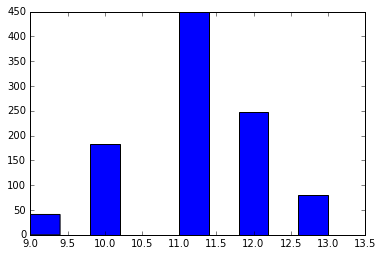

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_next_cost_distrib(state):
    costs = compute_next_cost_distrib(state)
    plt.hist(costs)
    plt.show()
plot_next_cost_distrib(initial)

In [20]:
current = copy(initial)

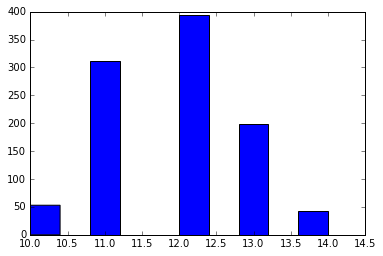

In [21]:
current = get_random_neighbour(current)
plot_next_cost_distrib(current)

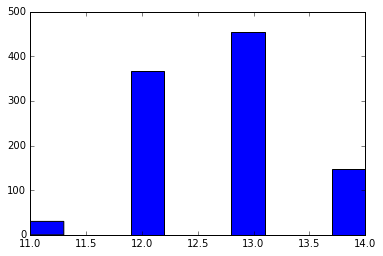

In [25]:
current = get_random_neighbour(current)
plot_next_cost_distrib(current)

In [31]:
def sa(initial):
    # Define initial values
    current = initial
    current_cost = cost_of_state(current)
    temp = 1.0 # initial value of t used in acceptance probability
    num_iterations = 0

    while current_cost > 0: # keep going until we find the global minimum
        neighbour = get_random_neighbour(current)
        neighbour_cost = cost_of_state(neighbour)

        cost_delta = neighbour_cost - current_cost

        # If the neighbouring state is at least as good as the current state
        # move to it, otherwise check the acceptance probability and only
        # move if the random number is less than it
        if cost_delta <= 0 or random.random() < math.exp(-cost_delta/temp):
            current, current_cost = neighbour, neighbour_cost

        num_iterations += 1

        # Decrease the temperature by 0.10 every 500 iterations until it's at 0.10
        if num_iterations % 300 == 0 and temp > 0.10:
            temp -= 0.10

    # We found the solution!
    # Return it and the number of iterations it took to get there
    return current, num_iterations

In [32]:
random.seed(100)

solution, iterations = sa(initial)

for house in solution:
    print house

print 'Number of iterations:', iterations
print 'Cost of solution:', cost_of_state(solution)

['norwegian', 'yellow', 'cat', 'water', 'dunhill']
['dane', 'blue', 'horse', 'tea', 'blends']
['brit', 'red', 'bird', 'milk', 'pall mall']
['german', 'green', 'fish', 'coffee', 'prince']
['swede', 'white', 'dog', 'root beer', 'blue master']
Number of iterations: 3472
Cost of solution: 0
